# Welcome to the Introduction to AI & ML Session 3





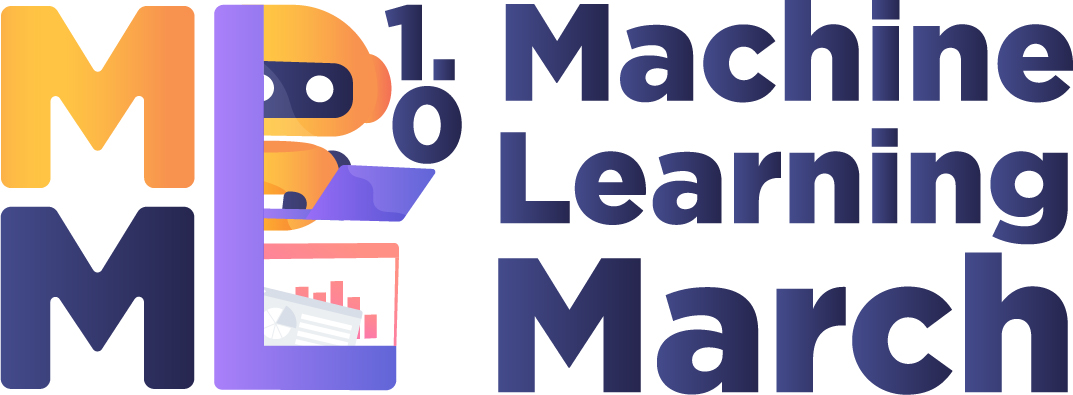

In [1]:
from IPython import display
display.Image("./images/mlm.jpg")

## Importing libraries 

In [2]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pylab as plot
import graphviz.backend as be
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import datasets
from sklearn.model_selection import train_test_split

# Importinf Data

In [3]:
df=pd.read_csv("./data sets/titanic-passengers.csv", delimiter = ';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data["Embarked"]=new_data.Cabin.fillna('S')

    return new_data
data=preprocess_data(df)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,G6
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,F G73
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,G6
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,G6
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,B71


In [20]:
df.shape

(891, 12)

In [18]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization 

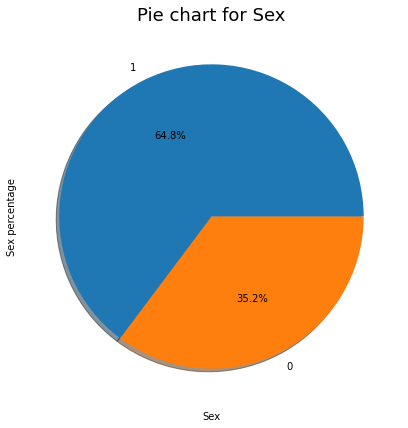

In [8]:
#Sex Pie Chart

fig = plt.figure(figsize =(10, 7))
plt.xlabel("Sex")
plt.ylabel("Sex percentage")
plt.title("Pie chart for Sex", fontsize=18)
vc=df['Sex'].value_counts()
plt.pie(vc, labels=vc.index, autopct='%1.1f%%', shadow=True)
 
# show plot
plt.show()
# the percentage of the male pessengers is more important than that of female ones.

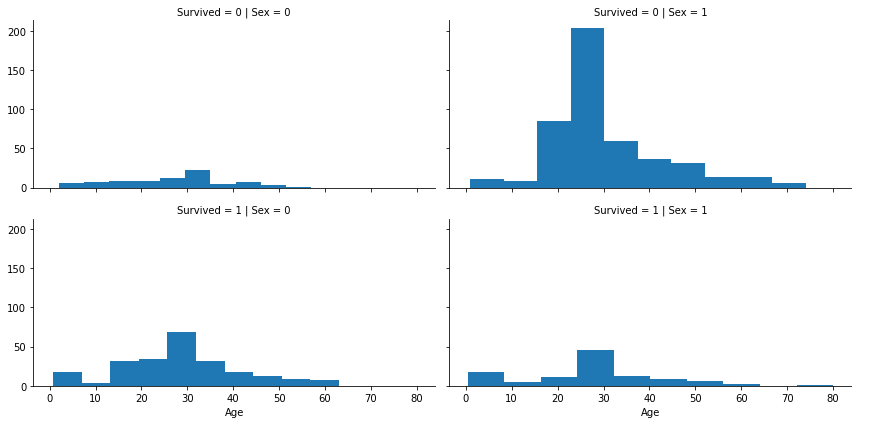

In [9]:
grid=sns.FacetGrid(data,row='Survived',col='Sex',height=3,aspect=2)
grid.map(plt.hist,'Age',bins=10)
grid.add_legend()

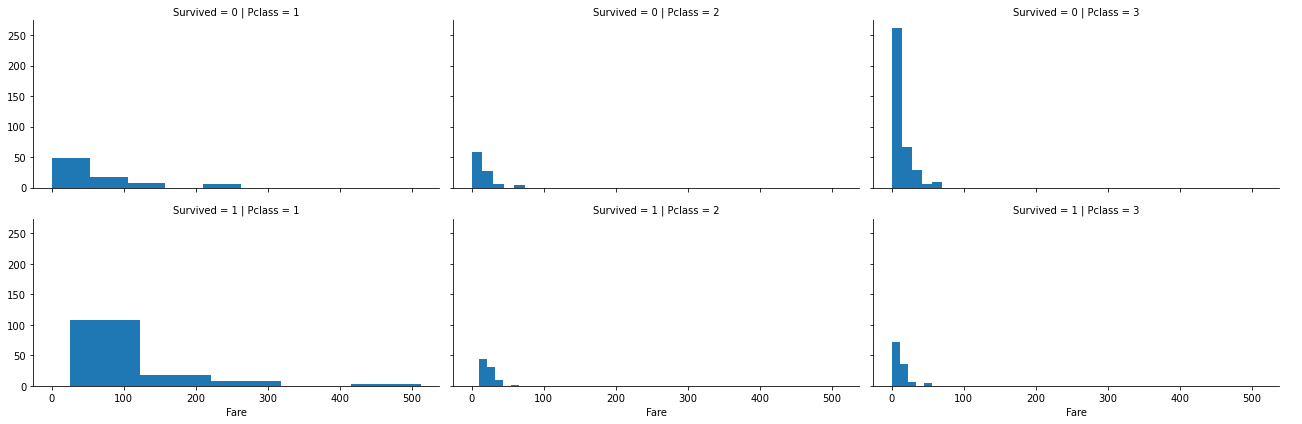

In [10]:
#Pick two other features and study their impact on the survival of the individuals.
grid=sns.FacetGrid(data,row='Survived',col='Pclass',height=3,aspect=2)
grid.map(plt.hist,'Fare',bins=5)
grid.add_legend()


##  Modeling
We've explored the data, now we'll try to use machine learning to predict our target variable based on the 12 independent variables.

Remember our problem?

Given clinical parameters about a patient, can we predict whether they are going to survive or not?

That's what we'll be trying to answer.


But before we build a model, we have to get our dataset ready.

Let's look at it again.

## Training and test split
Now comes one of the most important concepts in machine learning, the training/test split.

- This is where you'll split your data into a training set and a test set.

- You use your training set to train your model and your test set to test it.

- The test set must remain separate from your training set.

## Decision Tree Classifier Building in Scikit-learn

### Importing Required Libraries

Let's first install the required packages and load the required libraries.


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree  
from sklearn import metrics  # Importing metrics to test accuracy

### Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [12]:
#features extraction
x=data.drop(["Survived", "PassengerId", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]


### Splitting Data


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


The test_size parameter is used to tell `the train_test_split()`function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on.

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation.




### Building Decision Tree Model

Let's create a Decision Tree Model using `Scikit-learn`.

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

### Evaluating Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.776536312849162


Well, you got a classification rate of 77%, considered as good accuracy. 

### Visualizing Decision Trees

You can use Scikit-learn's `plot_tree` function from the tree module to display the tree within a Jupyter notebook. 

In [13]:
clf_dt = DecisionTreeClassifier(criterion = "entropy",max_depth=5,min_samples_split = 10 ) 
clf_dt.fit (x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [14]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15), dpi=500)
a = plot_tree(clf_dt,  
              filled=True, 
             class_names=["0", "1"],
              rounded=True, 
              fontsize=10)


In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.  

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.


Accordingly, the best split is the passenger’s sex since it costs least (Gini impurity). Indeed, by choosing this split, we maximize the accuracy. In this decision tree we have the following parameters: Gini index to measure the impurity, the samples that are the number of observations remaining to classify and the value is the how many samples are in class 0 (Did not survive) and how many samples are in class 1 (Survived).


## _________________________

​
## Pros
​
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.
([Source](https://scikit-learn.org/stable/modules/tree.html))
​
## Cons
​
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.
​